# **Grafos con Networkx**

In [1]:
import networkx as nx
import matplotlib.pyplot as plt


Primero descargue el dataset de la seguiente pagina: 

https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata?resource=download# 

Despues añadi la ruta de donde tengo el archivo csv con el seguiente comando que seria el seguiente:

file_path = 'C:/Users/constantin.madalin.i/Desktop/csvmovi/tmdb_5000_movies.csv'



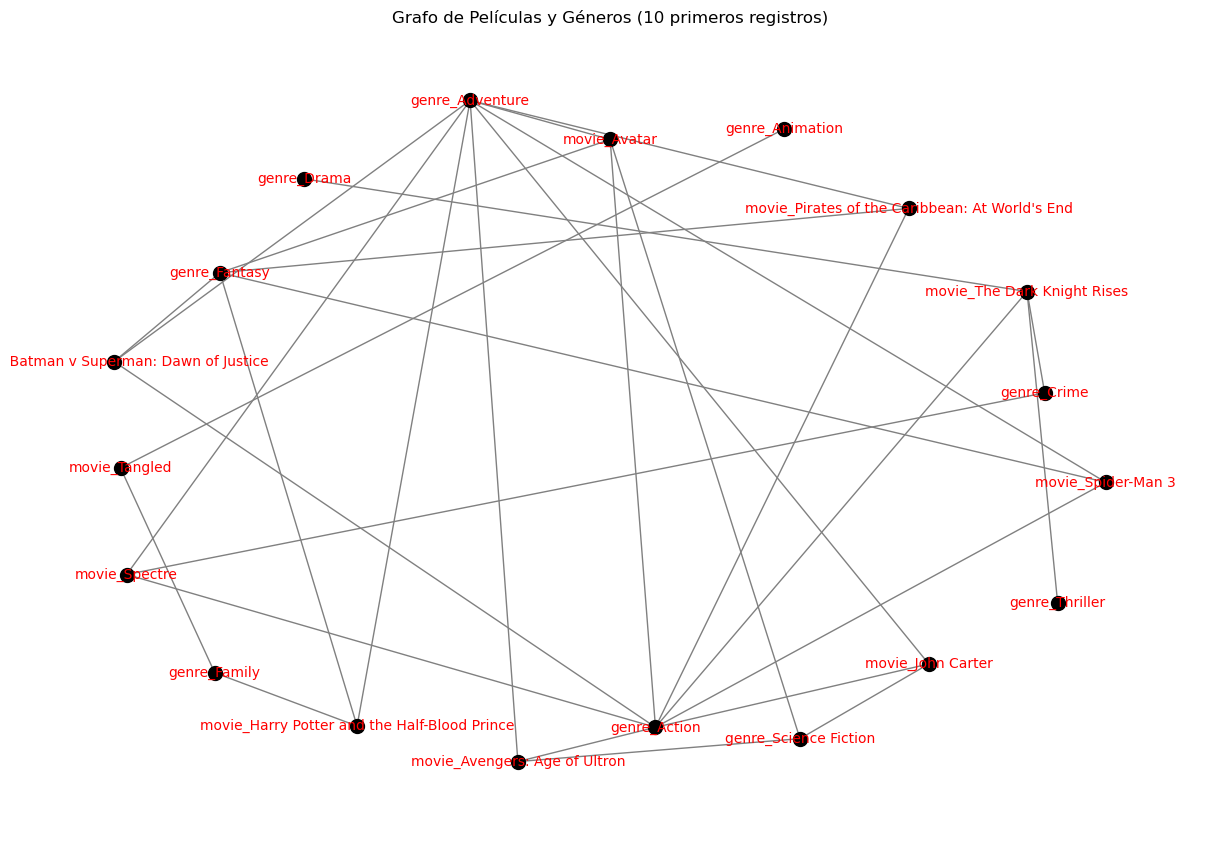

In [3]:
import pandas as pd
import networkx as nx
import ast
import matplotlib.pyplot as plt

# Cargar el archivo CSV
file_path = 'C:/Users/constantin.madalin.i/Desktop/csvmovi/tmdb_5000_movies.csv'
df = pd.read_csv(file_path, low_memory=False)

# Reducir el dataframe a los primeros 10 registros
df = df.head(10)

# Convertir la columna 'genres' de cadenas a listas de nombres
df['genres'] = df['genres'].apply(lambda x: [d['name'] for d in ast.literal_eval(x)] if isinstance(x, str) else [])

# Crear las conexiones para el grafo basadas en géneros
edges = []
for _, row in df.iterrows():
    movie_title = row['title']  # Título de la película
    for genre in row['genres']:
        edges.append((f"movie_{movie_title}", f"genre_{genre}"))

# Crear el grafo
G = nx.Graph()
G.add_edges_from(edges)

# Dibujar el grafo
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=6.2)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=100,
    node_color="black",
    edge_color="gray",
    font_size=10,
    font_color="red"
)

plt.title("Grafo de Películas y Géneros (10 primeros registros)")
plt.show()


pandas: Librería para manipulación de datos en estructuras tabulares (como CSVs).

networkx: Librería para crear, manipular y estudiar la estructura, dinámica y funciones de redes complejas.

matplotlib.pyplot: Librería para la visualización de gráficos en 2D (en este caso, para visualizar el grafo).

file_path: Especifica la ubicación del archivo CSV que contiene los datos.

pd.read_csv(): Carga el archivo CSV en un DataFrame.

low_memory=False: Desactiva la lectura optimizada por bloques en memoria para mejorar el rendimiento si los datos son grandes.

on_bad_lines='skip': Si se encuentra una línea mal formateada, la omite en lugar de generar un error. Esto ayuda a evitar fallos en la carga del archivo.


df.head(100): Selecciona las primeras 100 filas del DataFrame. Esto es útil para trabajar con una muestra pequeña del dataset y realizar pruebas rápidamente.


Aquí estamos creando una lista de tuplas (edges) que representarán las aristas del grafo.

Cada tupla representa una conexión entre un usuario y una película.

f"user_{row['userId']}": Crea un nodo para el usuario, prefijando su ID con "user_".

f"movie_{row['movieId']}": Crea un nodo para la película, prefijando su ID con "movie_".

df.iterrows(): Itera sobre las filas del DataFrame. row contiene cada fila de datos del archivo CSV.


G = nx.Graph(): Crea un grafo vacío.

G.add_edges_from(edges): Añade las aristas que creamos previamente (las conexiones entre usuarios y películas) al grafo. edges es una lista de tuplas que representan las aristas.



lt.figure(figsize=(12, 8)): Configura el tamaño de la ventana de visualización del grafo (12 de ancho y 8 de alto).

nx.draw(): Dibuja el grafo usando las configuraciones siguientes:

with_labels=True: Muestra las etiquetas de los nodos (es decir, los ID de los usuarios y películas).

node_size=500: Ajusta el tamaño de los nodos para que sean visibles.

node_color="lightblue": Establece el color de los nodos.

edge_color="gray": Define el color de las aristas (conexiones entre nodos).

font_size=8: Establece el tamaño de la fuente para las etiquetas de los nodos.

font_color="darkred": Define el color de la fuente para las etiquetas.


plt.title(): Establece el título del gráfico.

plt.show(): Muestra el gráfico en pantalla.



**Grafo no dirigido**

In [4]:
grafo=nx.Graph()
#añado nodos o vértices
grafo.add_node('A')
grafo.add_node('B')
grafo.add_node('C')
grafo.add_nodes_from(['D','E','F'])
#añado aristas
grafo.add_edge('A','B',weight=4)
grafo.add_edge('A','D',weight=10)
grafo.add_edge('B','C',weight=7)
grafo.add_edge('A','E',weight=5)
grafo.add_edge('E','F',weight=7)
grafo.add_edge('D','F',weight=8)
grafo.add_edge('D','C',weight=9)
grafo.add_edge('B','F',weight=14)

*Podemos hacerlo con un diccionario:*
Fíjate que en este caso el diccionario está formado por listas de tuplas, por lo tanto inmutables

In [5]:
grafo_dic = {
    'A': [('B', 4.0), ('F', 38.0)],
    'B': [('C', 7.0)],
    'C': [('B', 8.0), ('D', 19.0), ('E', 9.0)],
    'D': [('A',1.0),('E', 12.0), ('F', 8.0)],
    'E': [('C', 3.0),('D',8.0)],
    'F': [('C', 6.0)]
}

grafo=nx.Graph()
grafo.add_nodes_from(grafo_dic.keys())
for x,y in grafo_dic.items():
    for tupla in y:
        grafo.add_edge(x,tupla[0],weight=tupla[1])  # grafo.add_edge(x,tupla[0],weight=tupla[1],color='red') si queremos color en aristas

In [9]:
#lista de nodos o vértices
print (grafo.nodes)
#lista de aristas
print(grafo.edges)
#num de nodos y aristas
print("nodos:",grafo.number_of_nodes())
print("aristas: ",grafo.number_of_edges())

['A', 'B', 'C', 'D', 'E', 'F']
[('A', 'B'), ('A', 'F'), ('A', 'D'), ('B', 'C'), ('C', 'D'), ('C', 'E'), ('C', 'F'), ('D', 'E'), ('D', 'F')]
nodos: 6
aristas:  9


{('A', 'B'): Text(0.750000849657265, 0.43301125096819204, '4.0'),
 ('A', 'F'): Text(0.7500008198550456, -0.4330112019590522, '38.0'),
 ('A', 'D'): Text(-1.3149285027047597e-05, -1.9207393009423868e-08, '1.0'),
 ('B', 'C'): Text(-5.33845749162154e-06, 0.866025429642606, '8.0'),
 ('C', 'D'): Text(-0.7499991428923084, 0.4330141594679604, '19.0'),
 ('C', 'E'): Text(-0.49999996274718506, 1.0121134146334754e-06, '3.0'),
 ('C', 'F'): Text(1.3704992962715323e-07, -3.459134807481945e-07, '6.0'),
 ('D', 'E'): Text(-0.7500007900527237, -0.43301124567059057, '8.0'),
 ('D', 'F'): Text(-0.2500058844593872, -0.4330093543384925, '8.0')}

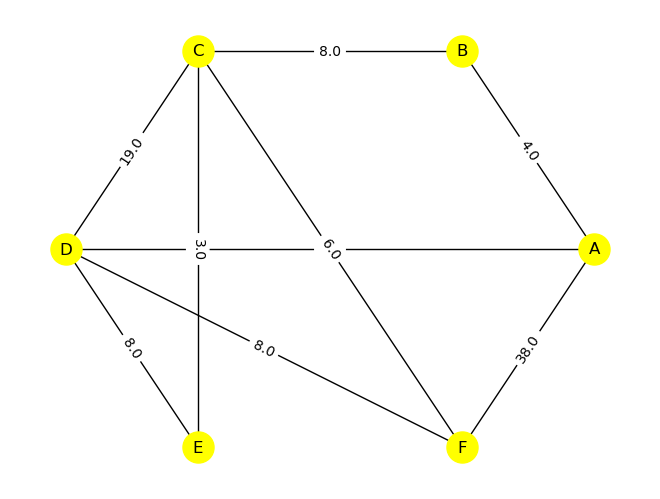

In [10]:
pos = nx.circular_layout(grafo)    #nx.spring_layout(grafo,seed=0)  # calculamos las posiciones de los nodos con la disposición actual

edges = grafo.edges()
# colors = [grafo[u][v]['color'] for u,v in edges]   # si queremos color en las aristas: 
# dibujamos el grafo con las posiciones calculadas
nx.draw(grafo, pos, with_labels=True, node_size=500,node_color='yellow', font_size=12)
# nx.draw(grafo, pos, with_labels=True, node_size=500,node_color='yellow', font_size=12,edge_color=colors) si queremos colores aristas
# dibujamos la etiquetas con los pesos
labels = nx.get_edge_attributes(grafo, 'weight')
nx.draw_networkx_edge_labels(grafo, pos, labels)

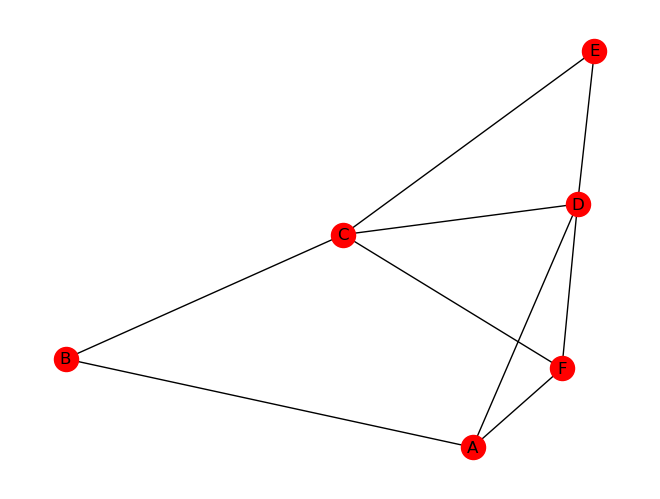

In [18]:
#visualizamos el grafo, cada vez que lo ejecuto se ve de una forma diferente
nx.draw(grafo,with_labels=True,node_color='red')


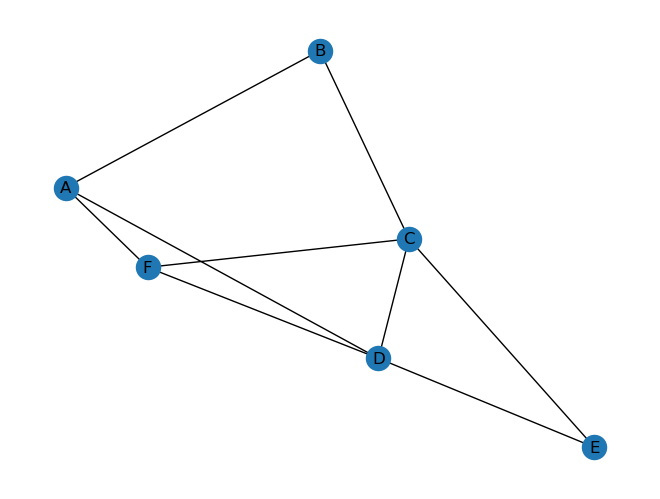

In [23]:
#podemos indicarle que siempre lo haga en el mismo sitio dando un valor a seed
posicio=nx.spring_layout(grafo, seed=5)
nx.draw(grafo,posicio,with_labels=True)

<a href="https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout"> Más layouts </a>

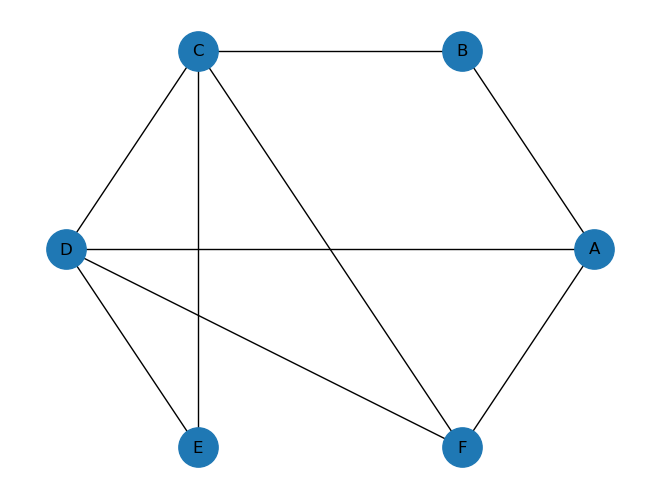

In [27]:
posicio=nx.circular_layout(grafo)       #posicio=nx.planar_layout(grafo) 
#nx.draw(grafo,posicio,with_labels=True,font_size=13)
nx.draw(grafo, posicio, with_labels=True, node_size=800, font_size=12)

{('A', 'B'): 4.0, ('A', 'F'): 38.0, ('A', 'D'): 1.0, ('B', 'C'): 8.0, ('C', 'D'): 19.0, ('C', 'E'): 3.0, ('C', 'F'): 6.0, ('D', 'E'): 8.0, ('D', 'F'): 8.0}


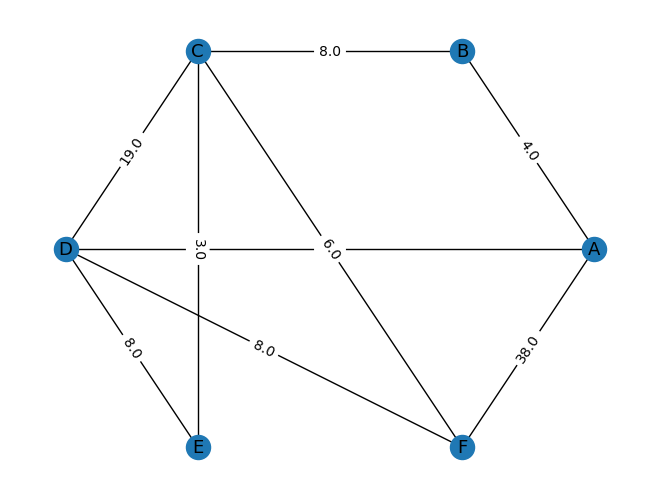

In [30]:

#pesos=nx.get_edge_attributes(grafo,'weight')  #extrae los pesos de las aristas
#print(pesos)

labels = nx.get_edge_attributes(grafo, 'weight')
print (labels)
nx.draw(grafo,posicio,with_labels=True,font_size=13)
nx.draw_networkx_edge_labels(grafo, posicio, labels)
plt.show()


**Grafo dirigido o digrafo**

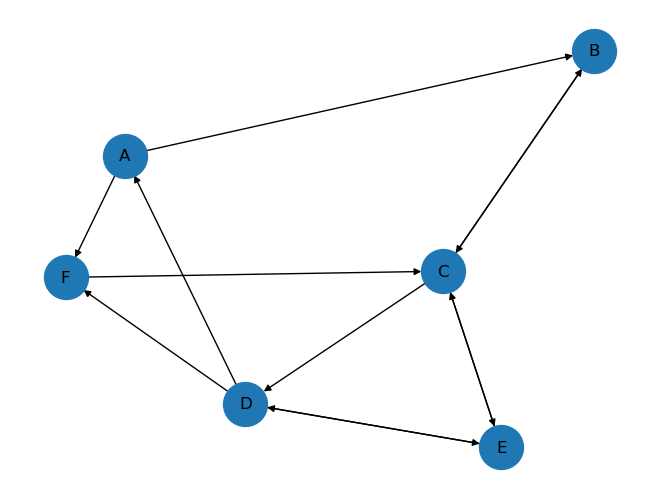

In [33]:
grafo_dic2 = { 'A': [('B', 4.0), ('F', 38.0)],
              'B': [('C', 7.0)],
              'C': [('B', 8.0),('D', 19.0), ('E', 9.0)],
              'D': [('A',1.0),('E', 12.0), ('F', 8.0)],
              'E': [('C', 3.0),('D',8.0)],
              'F': [('C', 6.0)] }

digrafo=nx.DiGraph() #simplemente usamos DiGraph en vez de Graph
digrafo.add_nodes_from(grafo_dic2.keys())



for x,y in grafo_dic2.items():
    for tupla in y:
        digrafo.add_edge(x,tupla[0],weight=tupla[1])

posicio=nx.spring_layout(digrafo, seed=5)
nx.draw(digrafo,posicio,with_labels=True,node_size=1000)




Grafo dirigido sin diccionario

{('A', 'B'): 4, ('A', 'D'): 10, ('A', 'E'): 5, ('B', 'C'): 7, ('B', 'F'): 14, ('D', 'F'): 8, ('D', 'C'): 9, ('E', 'F'): 7}


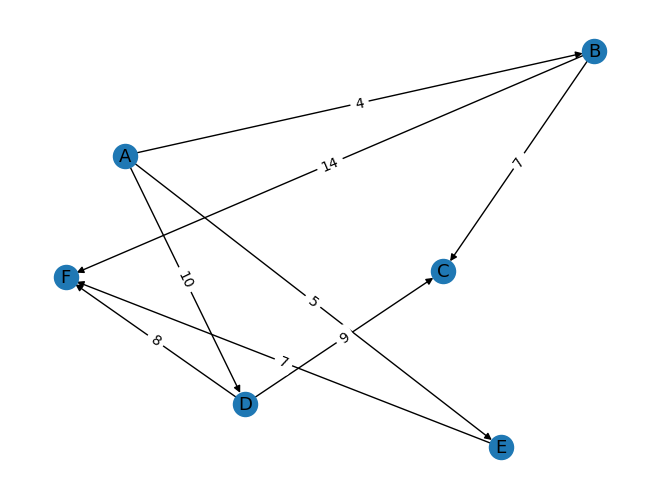

In [35]:
grafo=nx.DiGraph()
#añado nodos o vértices
grafo.add_node('A')
grafo.add_node('B')
grafo.add_node('C')
grafo.add_nodes_from(['D','E','F'])
#añado aristas
grafo.add_edge('A','B',weight=4)
grafo.add_edge('A','D',weight=10)
grafo.add_edge('B','C',weight=7)
grafo.add_edge('A','E',weight=5)
grafo.add_edge('E','F',weight=7)
grafo.add_edge('D','F',weight=8)
grafo.add_edge('D','C',weight=9)
grafo.add_edge('B','F',weight=14)
labels = nx.get_edge_attributes(grafo, 'weight')
print (labels)
nx.draw(grafo,posicio,with_labels=True,font_size=13)
nx.draw_networkx_edge_labels(grafo, posicio, labels)
plt.show()

# OpensStreetMap con **OSMnx**
Permite descargar, modelar,...redes de calles y otras características geoespaciales de OpenStreetMap

[Más información](https://networkx.org/documentation/stable/auto_examples/geospatial/plot_osmnx.html)

[Documento OSMnx](https://geoffboeing.com/publications/osmnx-paper/)

In [42]:
#!pip install osmnx   #lo instalamos la primera vez
import osmnx as ox

In [43]:
lugar="La Coruña,Galicia,España"
G=ox.graph_from_place(lugar,network_type='drive')

type(G)  # es un multidigrafo de networkx


networkx.classes.multidigraph.MultiDiGraph

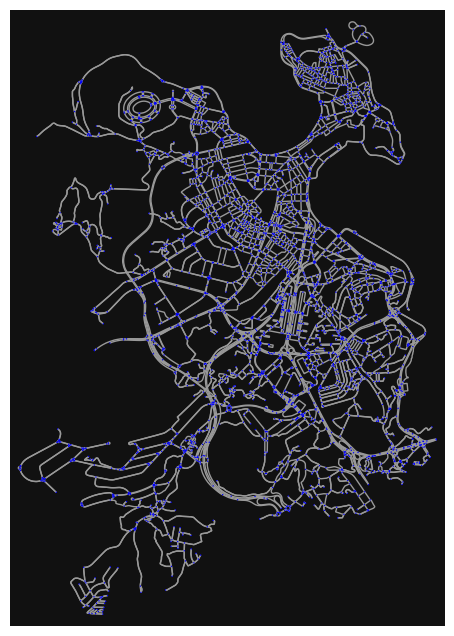

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [48]:
ox.plot_graph(G,node_size=1, node_color="blue")
